<a href="https://colab.research.google.com/github/zinseo964/Predict_Temperature_through_LSTM/blob/main/LSTM%2C_GRU_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [77]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract = True
)

csv_path, _ = os.path.splitext(zip_path)

In [78]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [79]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [80]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

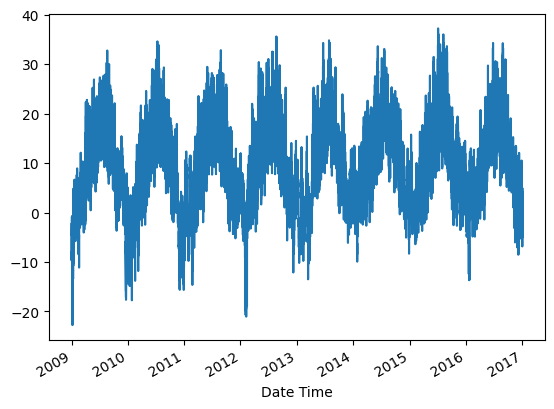

In [81]:
temp = df['T (degC)']
temp.plot()

In [82]:
def df_to_X_y (df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row =[[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [83]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [84]:
X_train1, y_train1 = X[:60000], y[:60000]
X_val1, y_val1 = X[60000:65000],y[60000:65000]
X_test1, y_test1 = X[65000:], y[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [87]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 41.0253 - root_mean_squared_error: 6.4051 - val_loss: 1.3728 - val_root_mean_squared_error: 1.1717
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.2601 - root_mean_squared_error: 1.5034 - val_loss: 0.6884 - val_root_mean_squared_error: 0.8297
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9833 - root_mean_squared_error: 0.9916 - val_loss: 0.5754 - val_root_mean_squared_error: 0.7585
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7546 - root_mean_squared_error: 0.8687 - val_loss: 0.5226 - val_root_mean_squared_error: 0.7229
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6909 - root_mean_squared_error: 0.8312 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6688 - root_mean_squared_error: 0.8178 - val_

In [88]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [89]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data ={'Train Predictions' : train_predictions, 'Actuals': y_train1})

1875/1875 [==============================] - 5s 3ms/step


In [90]:
train_results

,Train Predictions,Actuals
0,-9.875640,-9.67
1,-9.791307,-9.17
2,-8.902666,-8.10
3,-7.426248,-7.66
4,-7.181786,-7.04
...,...,...
59995,6.039168,6.07
59996,7.355041,9.88
59997,12.270455,13.53
59998,16.110661,15.43


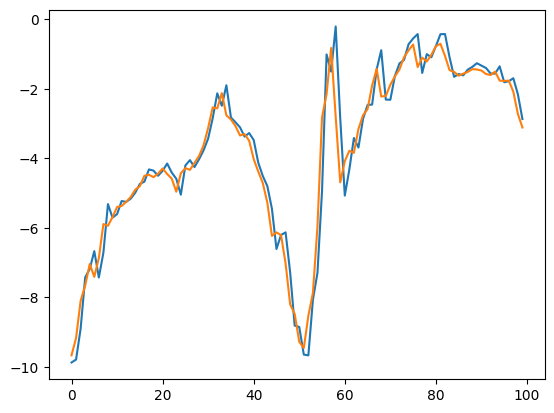

In [91]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [92]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,15.486680,14.02
1,13.262507,13.67
2,13.103175,12.27
3,11.573627,11.19
4,10.481640,10.85
...,...,...
4995,17.429012,18.27
4996,17.408432,17.85
4997,17.239973,16.65
4998,15.958879,15.85


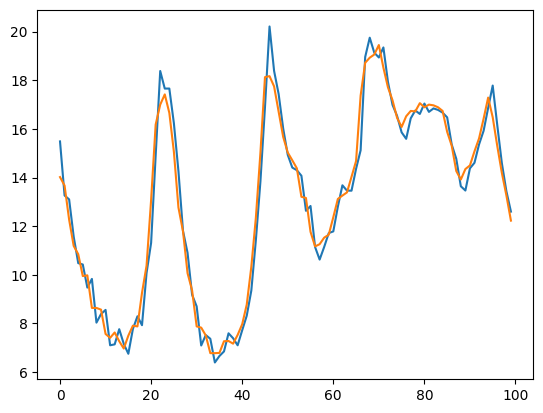

In [93]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [94]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,14.469070,13.99
1,13.338528,13.46
2,12.931784,12.93
3,12.519114,12.43
4,12.073358,12.17
...,...,...
5081,-0.949769,-0.98
5082,-1.568458,-1.40
5083,-1.786083,-2.75
5084,-3.030781,-2.89


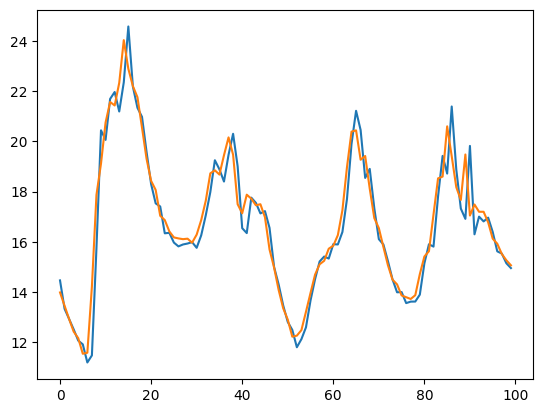

In [95]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

Part 2 : GRU

In [96]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model,X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

159/159 [==============================] - 0s 3ms/step


(      Predictions  Actuals
 0       14.469070    13.99
 1       13.338528    13.46
 2       12.931784    12.93
 3       12.519114    12.43
 4       12.073358    12.17
 ...           ...      ...
 5081    -0.949769    -0.98
 5082    -1.568458    -1.40
 5083    -1.786083    -2.75
 5084    -3.030781    -2.89
 5085    -3.112001    -3.93
 
 [5086 rows x 2 columns],
 0.626729540352522)

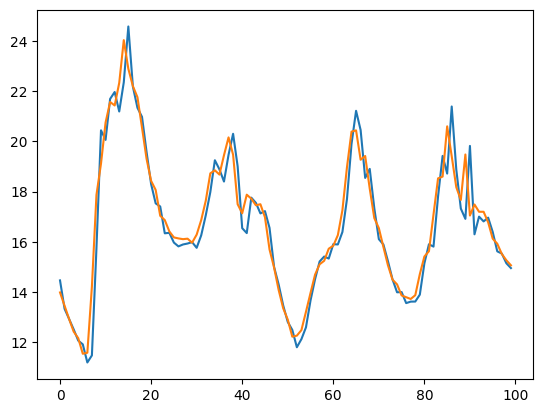

In [97]:
plot_predictions1(model1, X_test1, y_test1)

In [98]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 8)                 2056      
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
cp2 = ModelCheckpoint('model2/', save_best_only = True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [100]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 11.0351 - root_mean_squared_error: 3.3219 - val_loss: 1.7141 - val_root_mean_squared_error: 1.3092
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6514 - root_mean_squared_error: 1.2851 - val_loss: 0.9477 - val_root_mean_squared_error: 0.9735
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0276 - root_mean_squared_error: 1.0137 - val_loss: 0.6607 - val_root_mean_squared_error: 0.8128
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7703 - root_mean_squared_error: 0.8777 - val_loss: 0.5342 - val_root_mean_squared_error: 0.7309
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6957 - root_mean_squared_error: 0.8341 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7118
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6728 - root_mean_squared_error: 0.8203 - val_loss: 

In [101]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))

model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [103]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 43.6620 - root_mean_squared_error: 6.6077 - val_loss: 1.5536 - val_root_mean_squared_error: 1.2464
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.7311 - root_mean_squared_error: 1.6526 - val_loss: 0.7499 - val_root_mean_squared_error: 0.8659
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0938 - root_mean_squared_error: 1.0458 - val_loss: 0.5518 - val_root_mean_squared_error: 0.7429
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7645 - root_mean_squared_error: 0.8744 - val_loss: 0.5134 - val_root_mean_squared_error: 0.7165
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6853 - root_mean_squared_error: 0.8278 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7111
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6617 - root_mean_squared_error: 0.8134 - val_

In [104]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [105]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / year))
temp_df


,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [106]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [107]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [108]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [109]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [110]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X


In [111]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [112]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))

model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17920     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
cp4 = ModelCheckpoint('model4/', save_best_only = True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [114]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 41.5294 - root_mean_squared_error: 6.4443 - val_loss: 4.3089 - val_root_mean_squared_error: 2.0758
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 4.6057 - root_mean_squared_error: 2.1461 - val_loss: 2.1484 - val_root_mean_squared_error: 1.4657
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.9681 - root_mean_squared_error: 1.4029 - val_loss: 1.0761 - val_root_mean_squared_error: 1.0374
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.0956 - root_mean_squared_error: 1.0467 - val_loss: 0.7611 - val_root_mean_squared_error: 0.8724
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8257 - root_mean_squared_error: 0.9087 - val_loss: 0.6193 - val_root_mean_squared_error: 0.7870
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6766 - root_mean_squared_error: 0.8225 - val_

159/159 [==============================] - 1s 4ms/step


(      Predictions  Actuals
 0       13.319578    13.46
 1       12.944318    12.93
 2       12.568831    12.43
 3       12.285634    12.17
 4       12.409901    11.55
 ...           ...      ...
 5080    -1.023136    -0.98
 5081    -1.354437    -1.40
 5082    -1.662339    -2.75
 5083    -3.105544    -2.89
 5084    -3.172077    -3.93
 
 [5085 rows x 2 columns],
 0.49052272906284844)

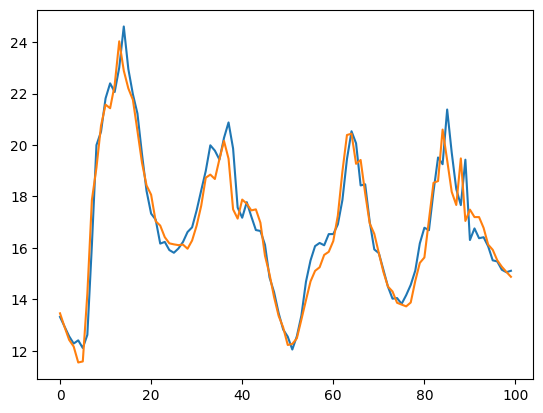

In [115]:
plot_predictions1(model4, X2_test, y2_test)

In [116]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis = 1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [117]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [118]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [119]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [120]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [121]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [122]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [123]:
model5 = Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                18176     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
cp5 = ModelCheckpoint('model5/', save_best_only = True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [125]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2474 - root_mean_squared_error: 0.4973 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2057
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1260
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0936
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0795
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_l

In [126]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]


159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.393241,0.412451,-0.780307,-0.793439
1,0.349218,0.353683,-0.764560,-0.763123
2,0.311220,0.323123,-0.731019,-0.721893
3,0.313181,0.250251,-0.680260,-0.652773
4,0.262974,0.254952,-0.599175,-0.652773
...,...,...,...,...
95,0.681159,0.716869,-0.407405,-0.416310
96,0.643192,0.687485,-0.409687,-0.399333
97,0.627935,0.663978,-0.393352,-0.399333
98,0.630745,0.641646,-0.383123,-0.400546


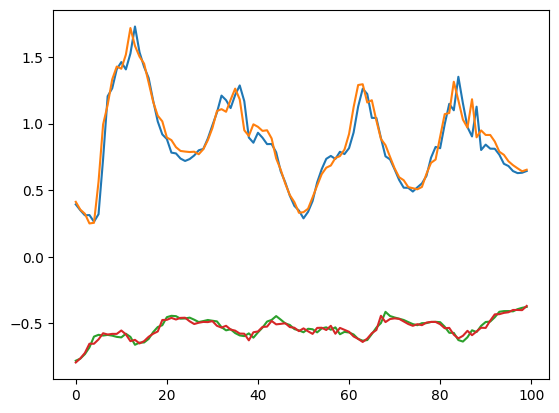

In [127]:
plot_predictions2(model5, X3_test, y3_test)

In [129]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [130]:
def plot_predictions3(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.766562,12.93,982.538330,982.43
1,12.392017,12.43,982.668152,982.68
2,12.068724,12.17,982.944763,983.02
3,12.085415,11.55,983.363342,983.59
4,11.658253,11.59,984.032043,983.59
...,...,...,...,...
95,15.216179,15.52,985.613464,985.54
96,14.893149,15.27,985.594666,985.68
97,14.763344,15.07,985.729370,985.68
98,14.787254,14.88,985.813721,985.67


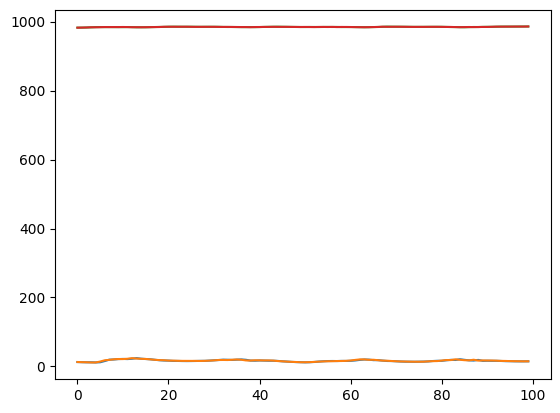

In [131]:
post_processed_df = plot_predictions3(model5, X3_test, y3_test)
post_processed_df

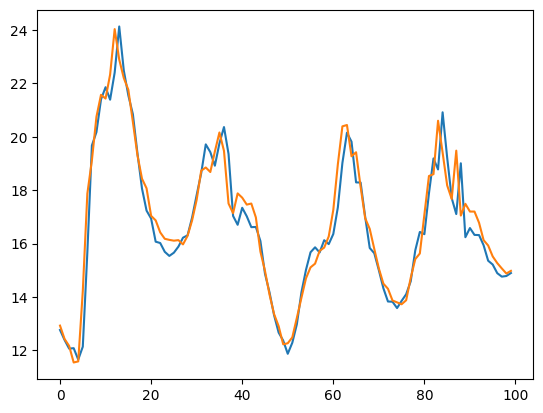

In [132]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

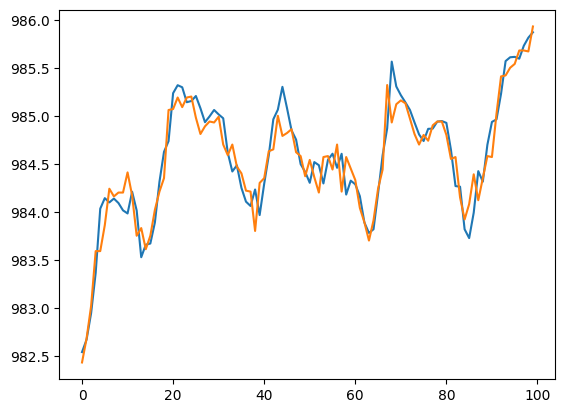

In [133]:
start, end = 0, 100
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [135]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 7, 32)             4992      
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
cp6 = ModelCheckpoint('model6/', save_best_only = True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [137]:
model6.fit(X3_train, y3_train, validation_data  = (X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 39s 18ms/step - loss: 0.1634 - root_mean_squared_error: 0.4042 - val_loss: 0.0441 - val_root_mean_squared_error: 0.2100
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0837
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0075 - root_mean_squared_error: 0.0865 -

159/159 [==============================] - 2s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.408266,0.412451,-0.777375,-0.793439
1,0.368743,0.353683,-0.764471,-0.763123
2,0.333865,0.323123,-0.735191,-0.721893
3,0.335582,0.250251,-0.687712,-0.652773
4,0.287864,0.254952,-0.604309,-0.652773
...,...,...,...,...
95,0.691332,0.716869,-0.390649,-0.416310
96,0.657624,0.687485,-0.396278,-0.399333
97,0.643012,0.663978,-0.387097,-0.399333
98,0.649274,0.641646,-0.378079,-0.400546


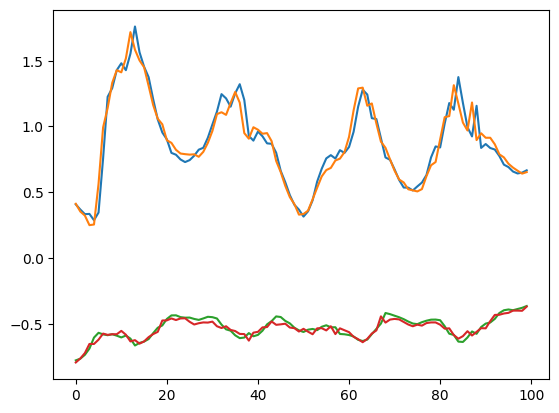

In [141]:
def plot_predictions4(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

plot_predictions4(model6, X3_test, y3_test)

In [138]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_28 (Dense)            (None, 8)                 3080      
                                                                 
 dense_29 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1732 - root_mean_squared_error: 0.4162 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1075
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - root_mean_squared_error: 0.0914 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.414746,0.412451,-0.787067,-0.793439
1,0.365115,0.353683,-0.756678,-0.763123
2,0.323552,0.323123,-0.718707,-0.721893
3,0.332097,0.250251,-0.682280,-0.652773
4,0.301581,0.254952,-0.610141,-0.652773
...,...,...,...,...
95,0.716997,0.716869,-0.422895,-0.416310
96,0.669607,0.687485,-0.408587,-0.399333
97,0.627061,0.663978,-0.379351,-0.399333
98,0.610303,0.641646,-0.355807,-0.400546


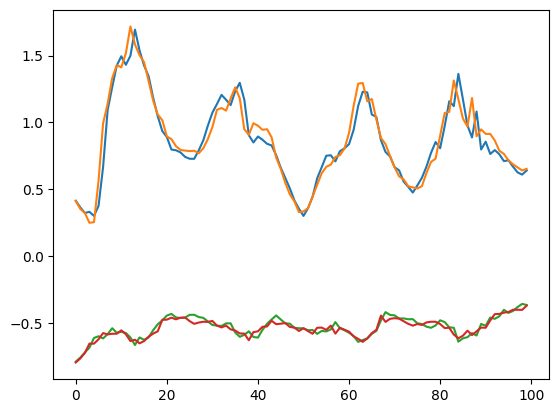

In [142]:
def plot_predictions5(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

plot_predictions5(model7, X3_test, y3_test)